## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

В файле parser.py

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.read_csv("election.csv")
df.head()
df['Явка'] = (df['Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования'] + df['Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования']) / df['Число избирателей, внесенных в список избирателей на момент окончания голосования']
df.sort_values("Явка", ascending=False, inplace=True)
df.head()


,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Явка
1232,Территориальная избирательная комиссия №19,УИК №1355,136,147,136,0,11,0,136,3,133,0,0,17,85,31,1.0
881,Территориальная избирательная комиссия №13,УИК №1268,603,650,328,275,47,275,328,10,593,0,0,41,512,40,1.0
152,Территориальная избирательная комиссия №2,УИК №2376,260,450,250,10,190,10,250,4,256,0,0,19,219,18,1.0
1890,Территориальная избирательная комиссия №28,УИК №2338,142,200,142,0,58,0,141,5,136,0,0,15,107,14,1.0
1455,Территориальная избирательная комиссия №22,УИК №405,346,500,335,11,154,11,335,6,340,0,0,3,332,5,1.0


In [73]:
ind = df.loc[df['Число избирателей, внесенных в список избирателей на момент окончания голосования'] * df['Явка'] > 100]['Амосов Михаил Иванович'].idxmax()
df.loc[[ind]]

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Явка
1085,Территориальная избирательная комиссия №17,УИК №567,2206,2000,635,8,1357,8,635,25,618,0,0,267,284,67,0.291478


In [74]:
delta = df.groupby("ТИК")["Явка"].max() - df.groupby("ТИК")["Явка"].min()
delta.idxmax()

'Территориальная избирательная комиссия №17'

In [75]:
df.groupby("ТИК")["Явка"].var()

ТИК
Территориальная избирательная комиссия №1     0.019318
Территориальная избирательная комиссия №10    0.007409
Территориальная избирательная комиссия №11    0.023945
Территориальная избирательная комиссия №12    0.003322
Территориальная избирательная комиссия №13    0.039350
Территориальная избирательная комиссия №14    0.003073
Территориальная избирательная комиссия №15    0.041609
Территориальная избирательная комиссия №16    0.011347
Территориальная избирательная комиссия №17    0.032932
Территориальная избирательная комиссия №18    0.023069
Территориальная избирательная комиссия №19    0.020470
Территориальная избирательная комиссия №2     0.046018
Территориальная избирательная комиссия №20    0.017357
Территориальная избирательная комиссия №21    0.031019
Территориальная избирательная комиссия №22    0.045004
Территориальная избирательная комиссия №23    0.058670
Территориальная избирательная комиссия №24    0.027113
Территориальная избирательная комиссия №25    0.000918
Террит

In [76]:
df['Процент Амосова']= np.round(df["Амосов Михаил Иванович"] / (df["Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"] + df["Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"]),2)
df['Процент Беглова']= np.round(df["Беглов Александр Дмитриевич"] / (df["Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"] + df["Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"]),2)
df['Процент Тихоновой']= np.round(df["Тихонова Надежда Геннадьевна"] / (df["Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"] + df["Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"]),2)
df.head()

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Явка,Процент Амосова,Процент Беглова,Процент Тихоновой
1232,Территориальная избирательная комиссия №19,УИК №1355,136,147,136,0,11,0,136,3,133,0,0,17,85,31,1.0,0.12,0.62,0.23
881,Территориальная избирательная комиссия №13,УИК №1268,603,650,328,275,47,275,328,10,593,0,0,41,512,40,1.0,0.07,0.85,0.07
152,Территориальная избирательная комиссия №2,УИК №2376,260,450,250,10,190,10,250,4,256,0,0,19,219,18,1.0,0.07,0.84,0.07
1890,Территориальная избирательная комиссия №28,УИК №2338,142,200,142,0,58,0,141,5,136,0,0,15,107,14,1.0,0.11,0.76,0.10
1455,Территориальная избирательная комиссия №22,УИК №405,346,500,335,11,154,11,335,6,340,0,0,3,332,5,1.0,0.01,0.96,0.01


In [77]:
df.groupby("Процент Амосова").count()["УИК"]

Процент Амосова
0.00      1
0.01      6
0.02      6
0.03      2
0.04     13
0.05     18
0.06     25
0.07     35
0.08     48
0.09     68
0.10     89
0.11    100
0.12    117
0.13    130
0.14    131
0.15    160
0.16    153
0.17    152
0.18    126
0.19    102
0.20     89
0.21     82
0.22     77
0.23     44
0.24     56
0.25     40
0.26     45
0.27     26
0.28     26
0.29     17
0.30     15
0.31      5
0.32      6
0.33      4
0.34      1
0.35      3
0.36      2
0.42      1
Name: УИК, dtype: int64

In [78]:
print(df.groupby("Процент Беглова").count()["УИК"].to_string())

Процент Беглова
0.30      1
0.32      1
0.33      2
0.38      3
0.39      3
0.40      3
0.41      5
0.42      3
0.43      3
0.44      9
0.45      8
0.46     10
0.47     21
0.48     14
0.49     24
0.50     27
0.51     37
0.52     37
0.53     44
0.54     36
0.55     52
0.56     62
0.57     68
0.58     77
0.59     79
0.60    122
0.61     93
0.62     92
0.63     97
0.64     90
0.65     80
0.66     82
0.67     74
0.68     77
0.69     62
0.70     72
0.71     49
0.72     53
0.73     40
0.74     37
0.75     38
0.76     28
0.77     23
0.78     19
0.79     20
0.80     20
0.81     25
0.82     13
0.83     14
0.84     15
0.85      9
0.86      7
0.87      7
0.88      5
0.89      5
0.90      6
0.91      7
0.92      2
0.93      1
0.94      3
0.95      2
0.96      1
0.98      2


In [79]:
df.groupby("Процент Тихоновой").count()["УИК"]

Процент Тихоновой
0.00      2
0.01      4
0.02      5
0.03     11
0.04      9
0.05     15
0.06     21
0.07     22
0.08     35
0.09     45
0.10     47
0.11     52
0.12     67
0.13     78
0.14    117
0.15    145
0.16    217
0.17    188
0.18    186
0.19    203
0.20    151
0.21    117
0.22     97
0.23     58
0.24     28
0.25     21
0.26     21
0.27      9
0.28      9
0.29      8
0.30      3
0.31      8
0.32      3
0.33      5
0.34      1
0.35      5
0.36      2
0.37      1
0.38      1
0.40      1
0.41      1
0.44      1
0.48      1
Name: УИК, dtype: int64

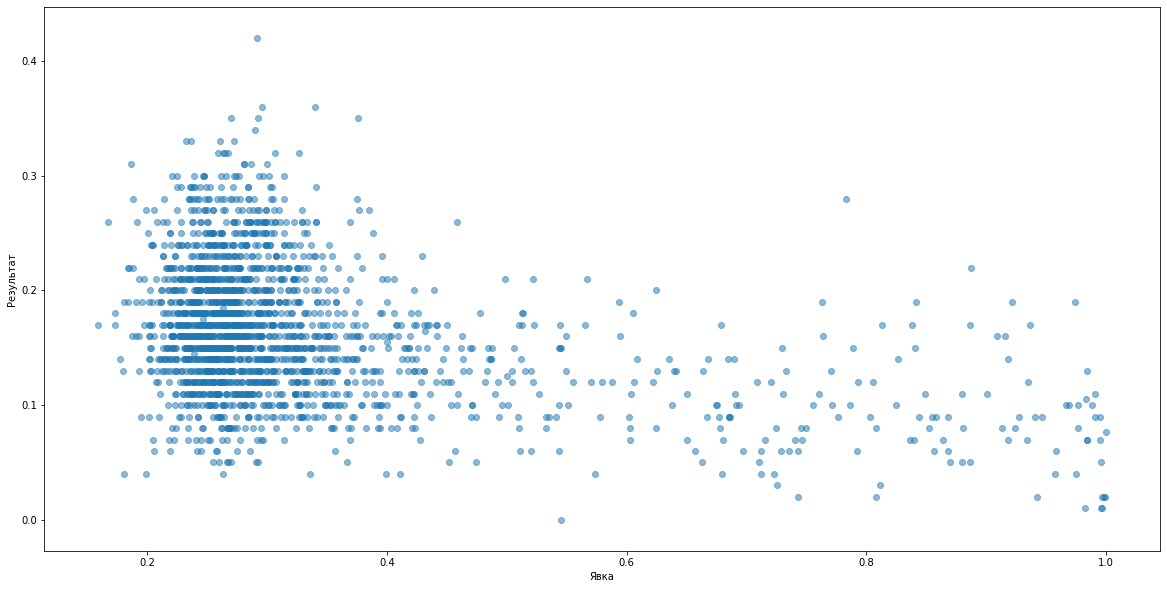

In [91]:
amosov = df.groupby("Явка")["Процент Амосова"].mean()

plt.figure(figsize=(20, 10))
plt.scatter(amosov.index, amosov.values, alpha=0.5)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()

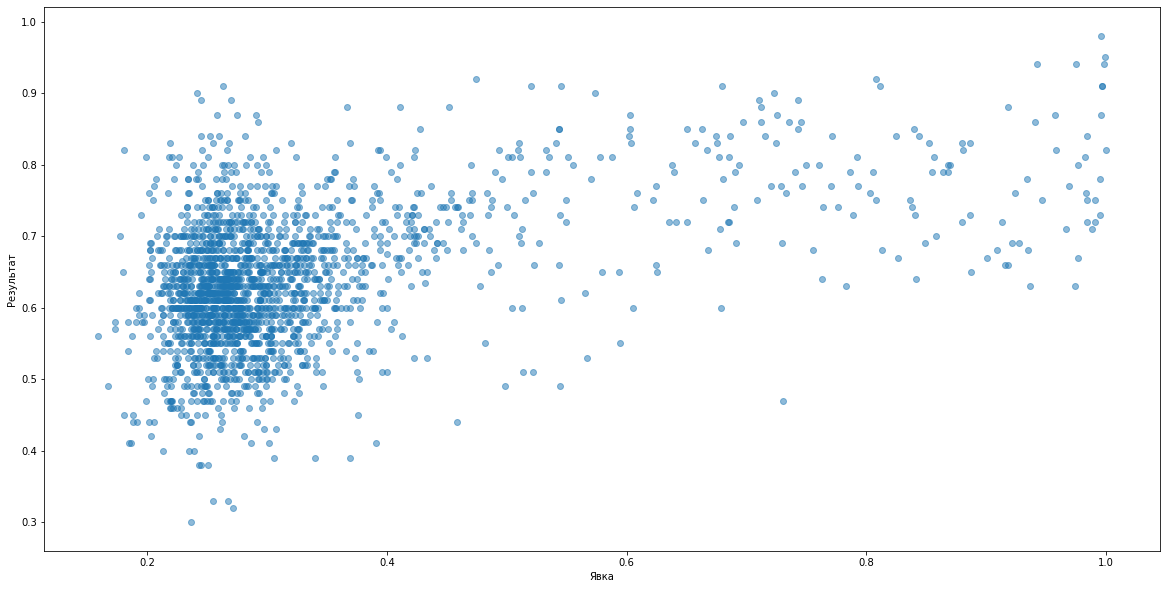

In [89]:
beglov = df.groupby("Явка")["Процент Беглова"].mean()

plt.figure(figsize=(20, 10))
plt.scatter(beglov.index, beglov.values, alpha=0.5)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()

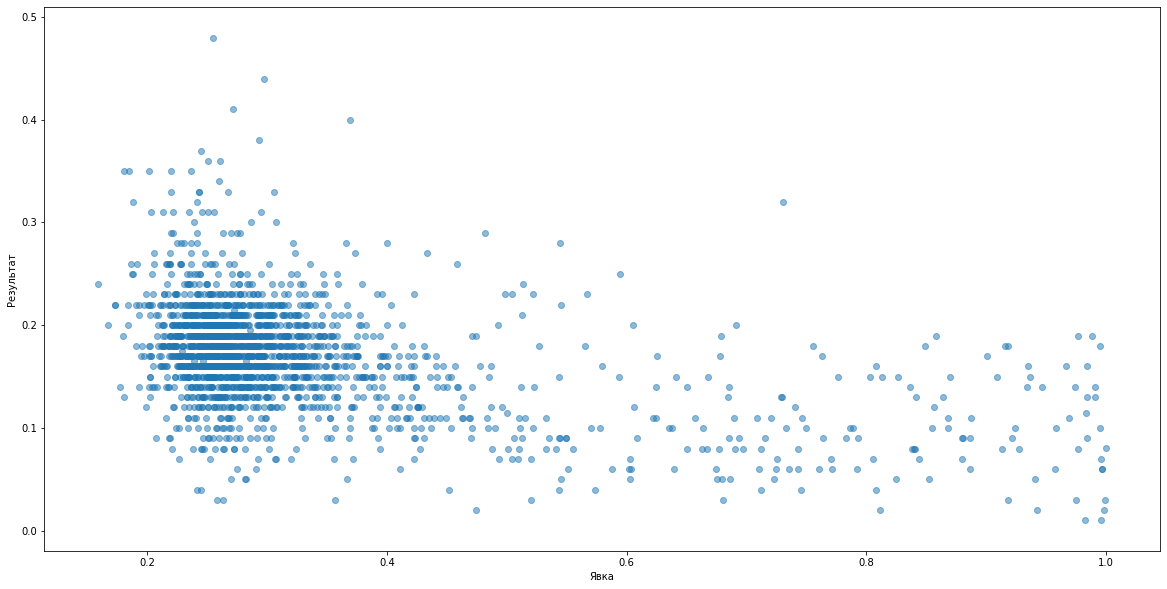

In [92]:
tihonova = df.groupby("Явка")["Процент Тихоновой"].mean()

plt.figure(figsize=(20, 10))
plt.scatter(tihonova.index, tihonova.values, alpha=0.5)
plt.xlabel("Явка")
plt.ylabel("Результат")
plt.show()